<h1>PPMI Data Visualization</h1>

In [1]:
import numpy as np
import nibabel as nib
import scipy.linalg as scipy
import pandas as pd
import nrrd
import os
import seaborn as sb
import matplotlib.pyplot as plt

In [32]:
DATA_PATH = ".\\data"
IMAGE_COLLECTION_CHARAC_FOLDER = "image_collection_characteristics"
IMAGE_COLLECTION_CHARAC_FILE = "characteristics.csv"

CSV_SEPARATOR = ";"

<h3>Subject characteristics exploration and visualization</h3>

In [34]:
image_collection_charac_df = pd.read_csv(os.path.join(DATA_PATH, IMAGE_COLLECTION_CHARAC_FOLDER, IMAGE_COLLECTION_CHARAC_FILE), sep=CSV_SEPARATOR)

<Figure size 432x288 with 0 Axes>

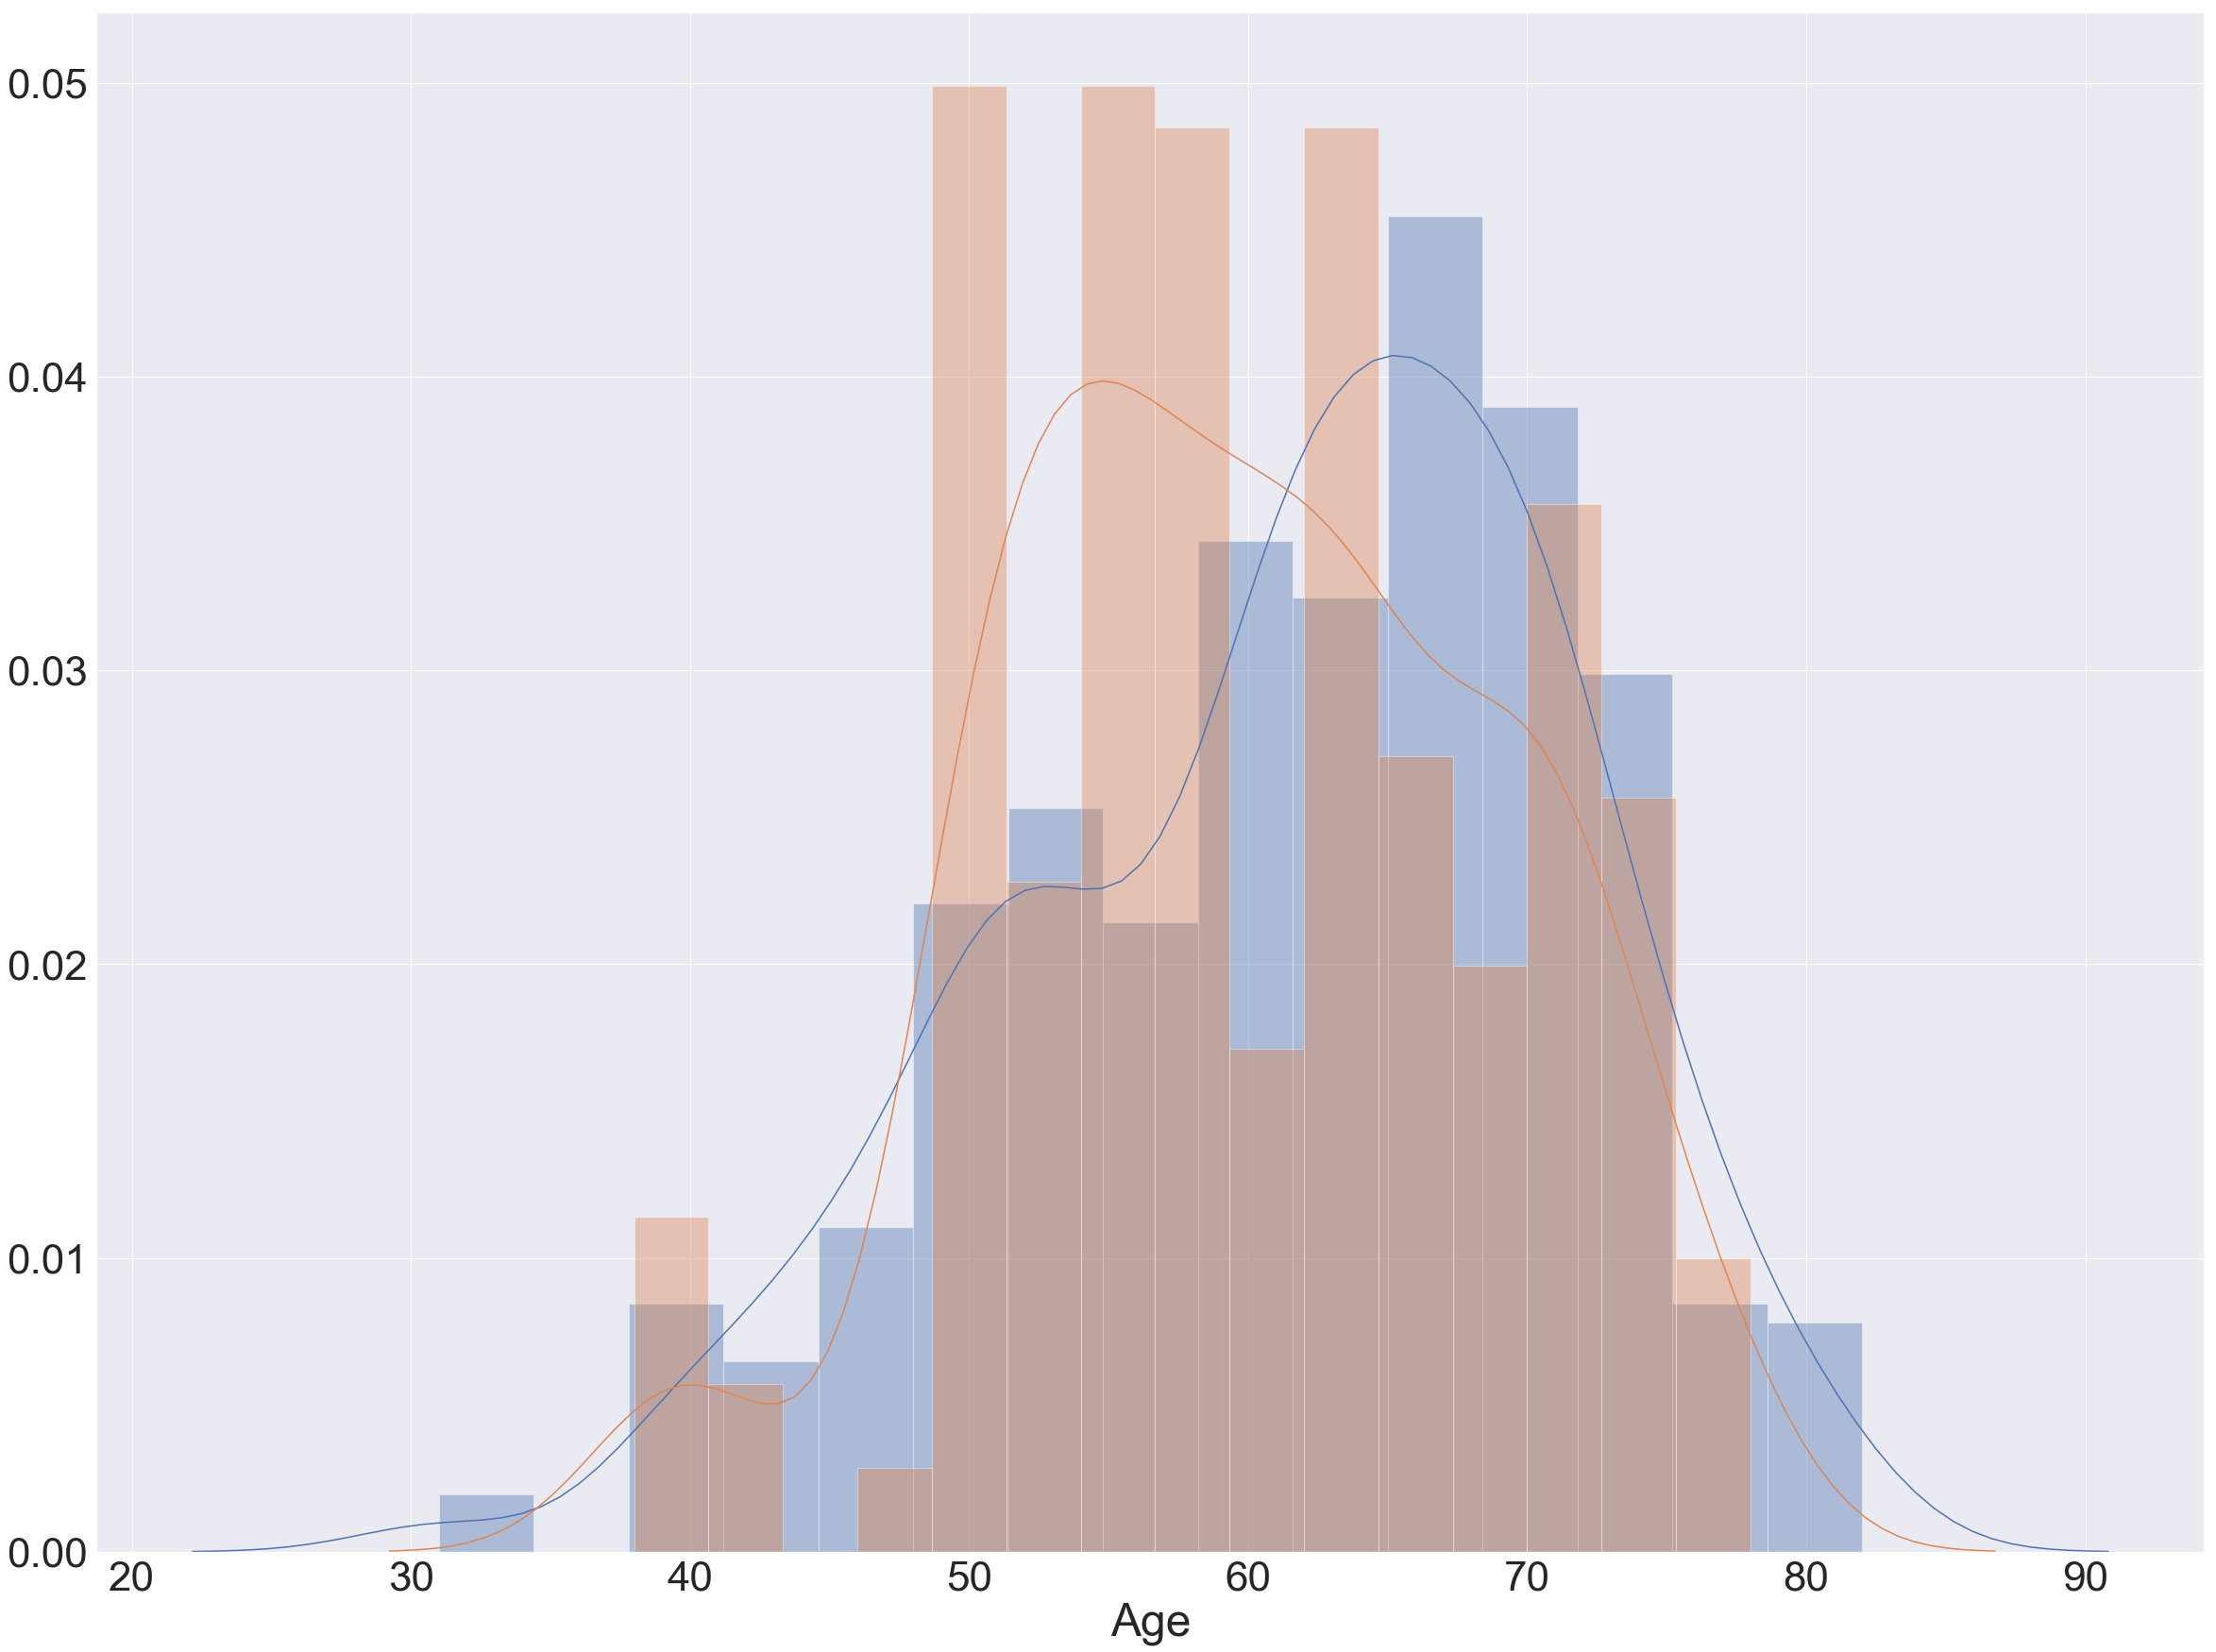

In [26]:
plt.figure()
sb.set(font_scale=4)
Xfig, ax = plt.subplots(figsize=(40,30))
sb.distplot(charac[charac['Sex'] == "M"]['Age'], ax=ax, bins=15)
sb.distplot(charac[charac['Sex'] == "F"]['Age'], ax=ax, bins=15)

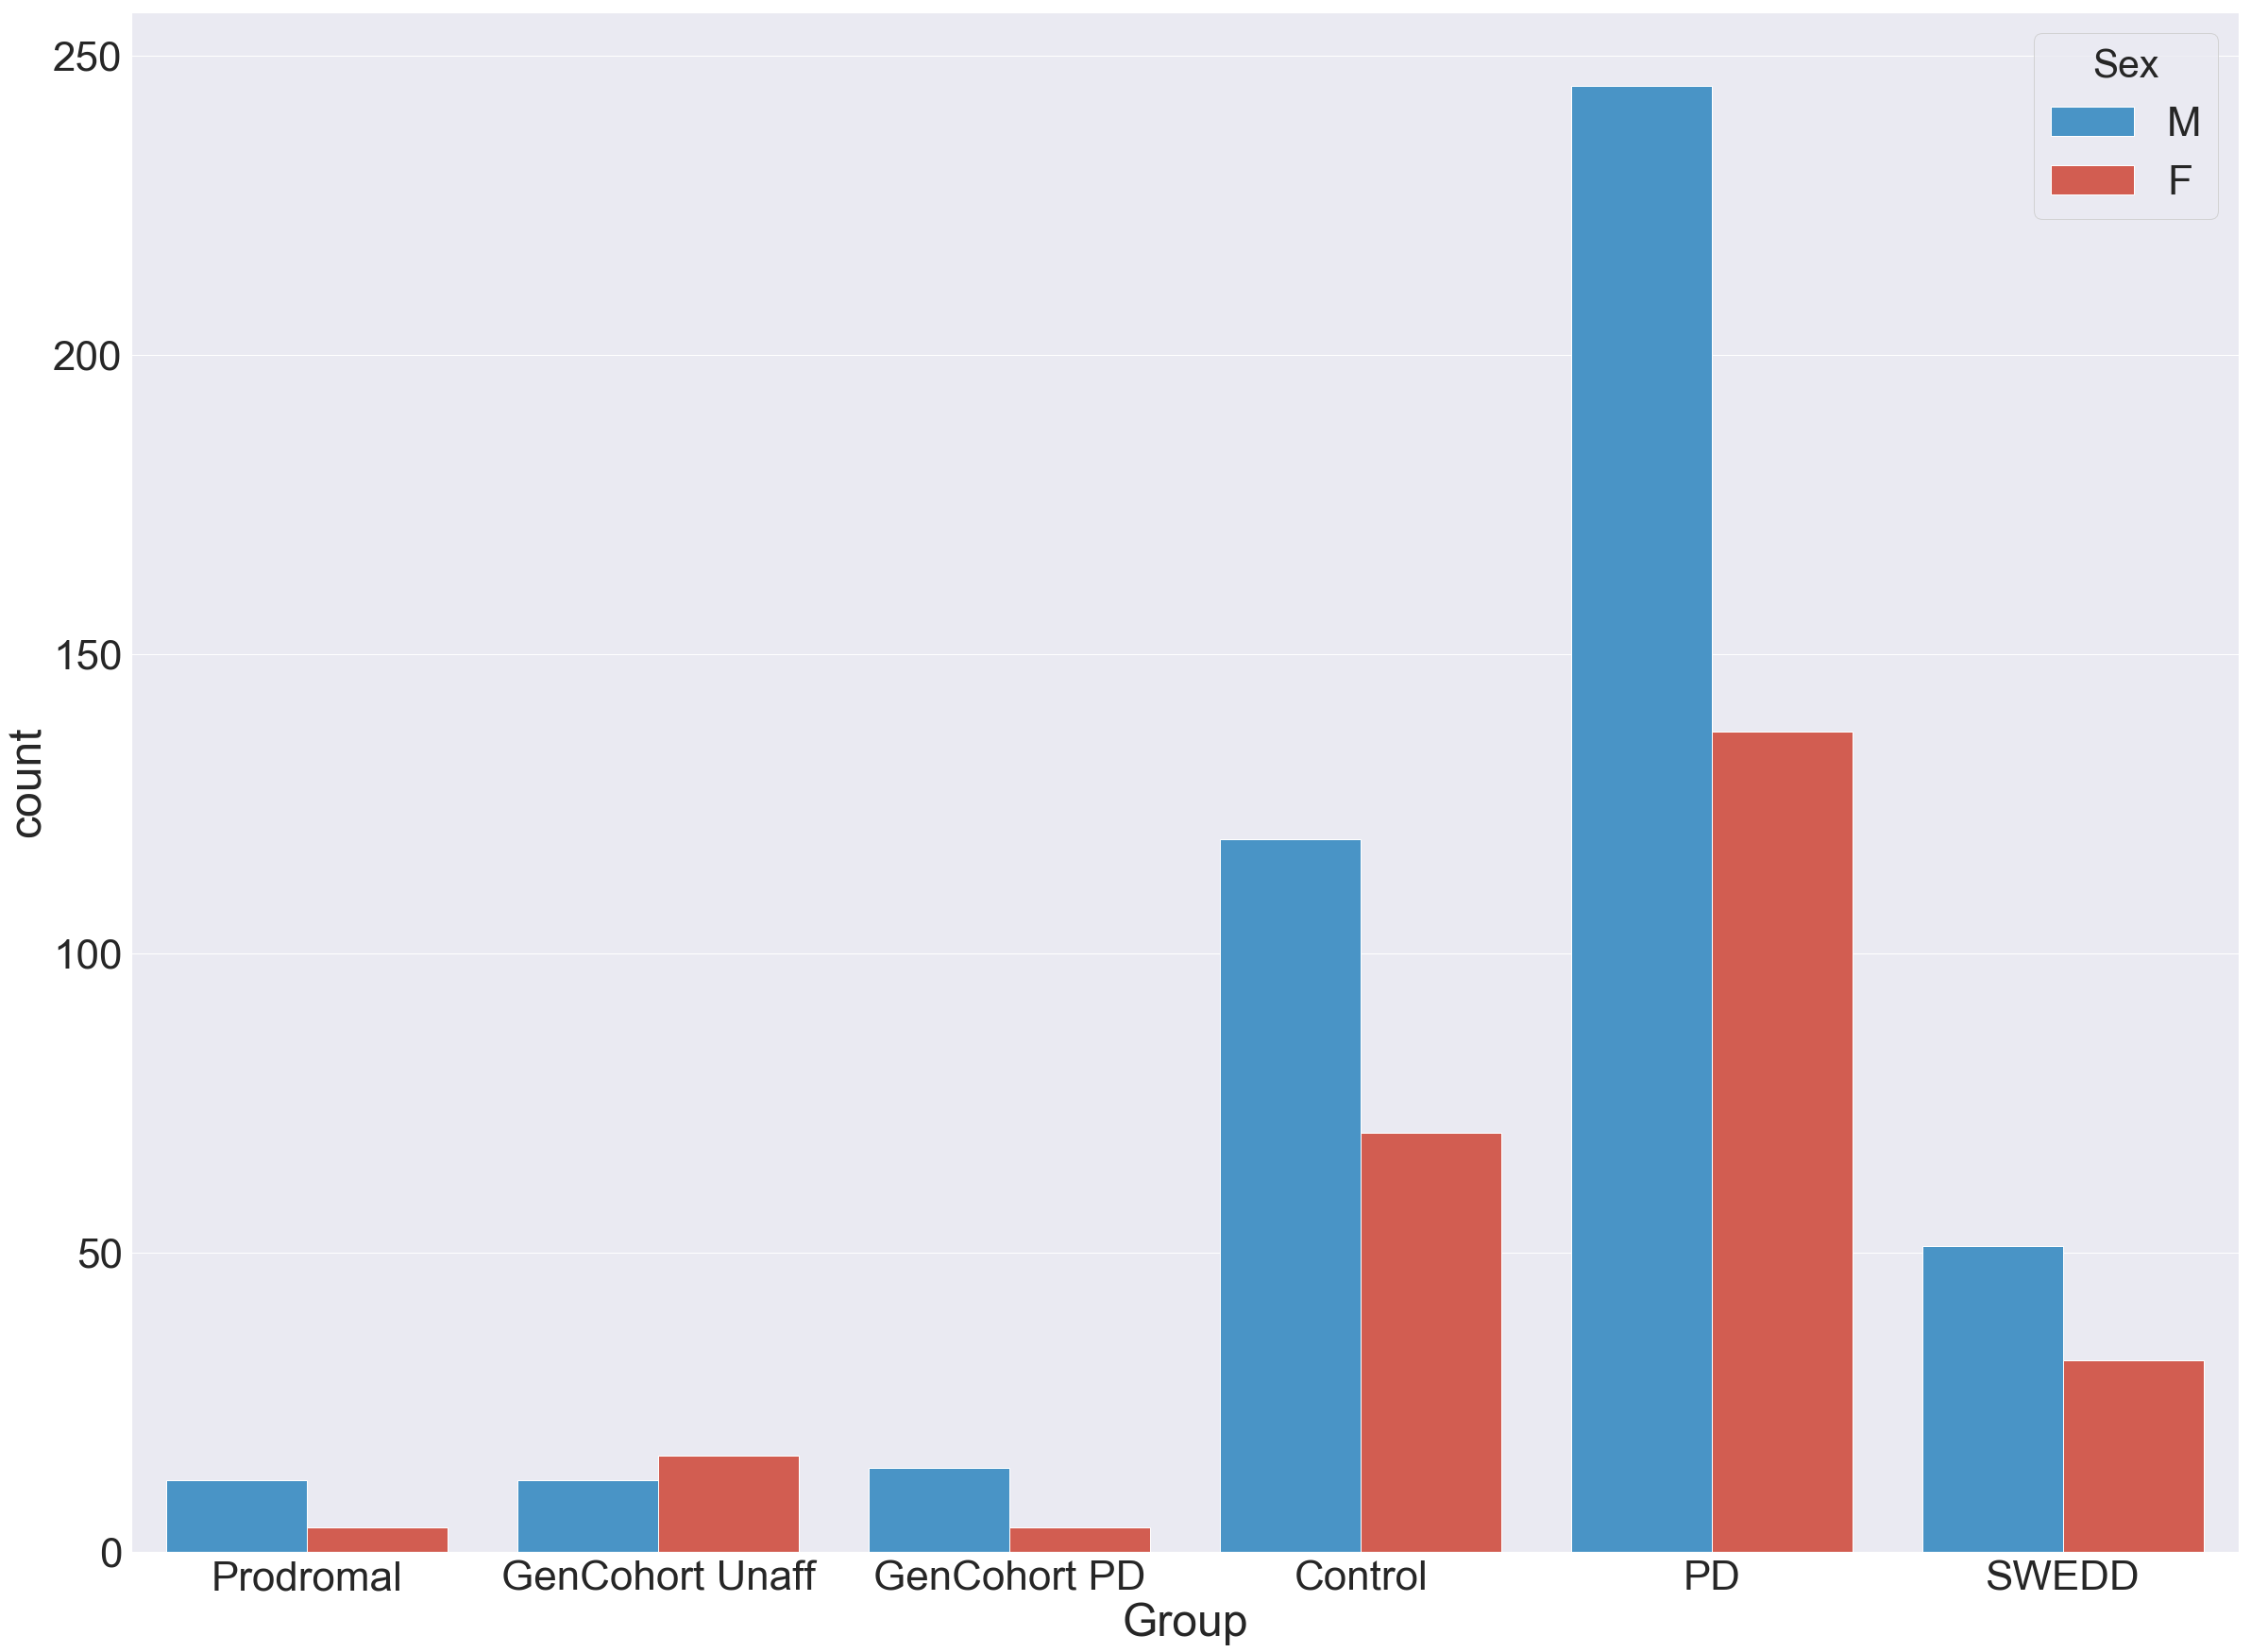

In [163]:
sb.set(font_scale=4)
Xfig, ax = plt.subplots(figsize=(40,30))
sb.countplot(x="Group", data=charac, hue="Sex",palette={'M': "#3498db", 'F': "#e74c3c"},ax=ax)

In [142]:
dataFrame = pd.DataFrame(charac['Group'].value_counts()).reset_index()
dataFrame.columns = ['Group', 'Count']
dataFrame

,Group,Count
0,PD,382
1,Control,189
2,SWEDD,83
3,GenCohort Unaff,28
4,GenCohort PD,18
5,Prodromal,16
